In [25]:
import os

# shortcuts
CURR = os.getcwd()
HOME = f"{CURR}/datasets"
DATA_PATH = f"{HOME}/Pickle-Ball---Tom-Brady-Reach-Out-47"
YAML_PATH = f"{DATA_PATH}/data.yaml"

bytetrack.yaml    finetuned-yolo.pt train_model.ipynb
datasets          test-input.mp4    venv


In [12]:
# create venv

# install dependencies
! pip install ultralytics==8.0.196 opencv-python==4.8.0.74 roboflow --quiet

/Users/joaquinmendoza/Downloads/cs/class/cs-577/computer-vision/datasets


In [5]:
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.4 torch-2.2.2 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 213.5/228.3 GB disk)


In [23]:
from roboflow import Roboflow
rf = Roboflow(api_key="rK3zYNfGqsVFhinEr8GB")
project = rf.workspace("salo-levy-nlqrn").project("pickle-ball-tom-brady-reach-out")
dataset = project.version(47).download("yolov8")

import os

# Print the number of samples
train_dir = f"{DATA_PATH}/train/images"
valid_dir = f"{DATA_PATH}/valid/images"
test_dir = f"{DATA_PATH}/test/images"

train_count = len([file for file in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, file))])
valid_count = len([file for file in os.listdir(valid_dir) if os.path.isfile(os.path.join(valid_dir, file))])
test_count = len([file for file in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, file))])

print(f"\nTrain Set: {train_count} Images")
print(f"Valid Set: {valid_count} Images")
print(f"Test Set: {test_count} Images")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pickle-Ball---Tom-Brady-Reach-Out-47 in yolov8:: 100%|██████████| 1494/1494 [00:00<00:00, 5359.25it/s]


Train Set: 690 Images
Valid Set: 29 Images
Test Set: 22 Images


In [24]:
import requests
import json
import pprint

# view records containing class "Ball"
records = []
for page in project.search_all(
    class_name = "Ball"
):
    records.extend(page)

print("Records found:", len(records))

result = requests.get(f"https://api.roboflow.com/salo-levy-nlqrn/pickle-ball-tom-brady-reach-out/images/{records[0].get('id')}?api_key=rK3zYNfGqsVFhinEr8GB")
pprint.pprint(result.json(), compact=True)
# id: datasets/Pickle-Ball---Tom-Brady-Reach-Out-47/test/images/youtube-4_jpg.rf.9e0fbd0a1b38bed9322d4bfe2f43bfac.jpg

Records found: 161
{'image': {'annotation': {'boxes': [{'height': '177.69',
                                     'label': 'Team 1',
                                     'width': '97.70',
                                     'x': '473.88',
                                     'y': '316.05'},
                                    {'height': '260.77',
                                     'label': 'Team 2',
                                     'width': '94.11',
                                     'x': '1728.77',
                                     'y': '263.22'},
                                    {'height': '20.09',
                                     'label': 'Ball',
                                     'width': '23.66',
                                     'x': '729.48',
                                     'y': '243.86'},
                                    {'height': '402.19',
                                     'label': 'Team 2',
                                     'width': '217.

In [47]:
# flip to 'False' to train model
is_trained = True

# train model
if not is_trained:
    !yolo task=detect mode=train model=yolov8s.pt data={YAML_PATH} epochs=25 imgsz=800 plots=True workers=0
else:
    print(f"Model has been trained. Results at {HOME}/runs/detect/train")

New https://pypi.org/project/ultralytics/8.2.1 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.0+cu117 CUDA:0 (NVIDIA A100 80GB PCIe MIG 1g.10gb, 9728MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/jovyan/datasets/Pickle-Ball---Tom-Brady-Reach-Out-47/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_bu

In [54]:
!ls {HOME}/runs/detect/train4/

args.yaml
confusion_matrix_normalized.png
confusion_matrix.png
events.out.tfevents.1713458825.jupyter-jmendoza9-40sdsu-2eedu.2191.0
F1_curve.png
labels_correlogram.jpg
labels.jpg
P_curve.png
PR_curve.png
R_curve.png
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
train_batch660.jpg
train_batch661.jpg
train_batch662.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
weights


In [26]:
# Confusion Matrix
display(Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600))
print("\n")
display(Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joaquinmendoza/Downloads/cs/class/cs-577/computer-vision/datasets/datasets/runs/detect/train/confusion_matrix.png'

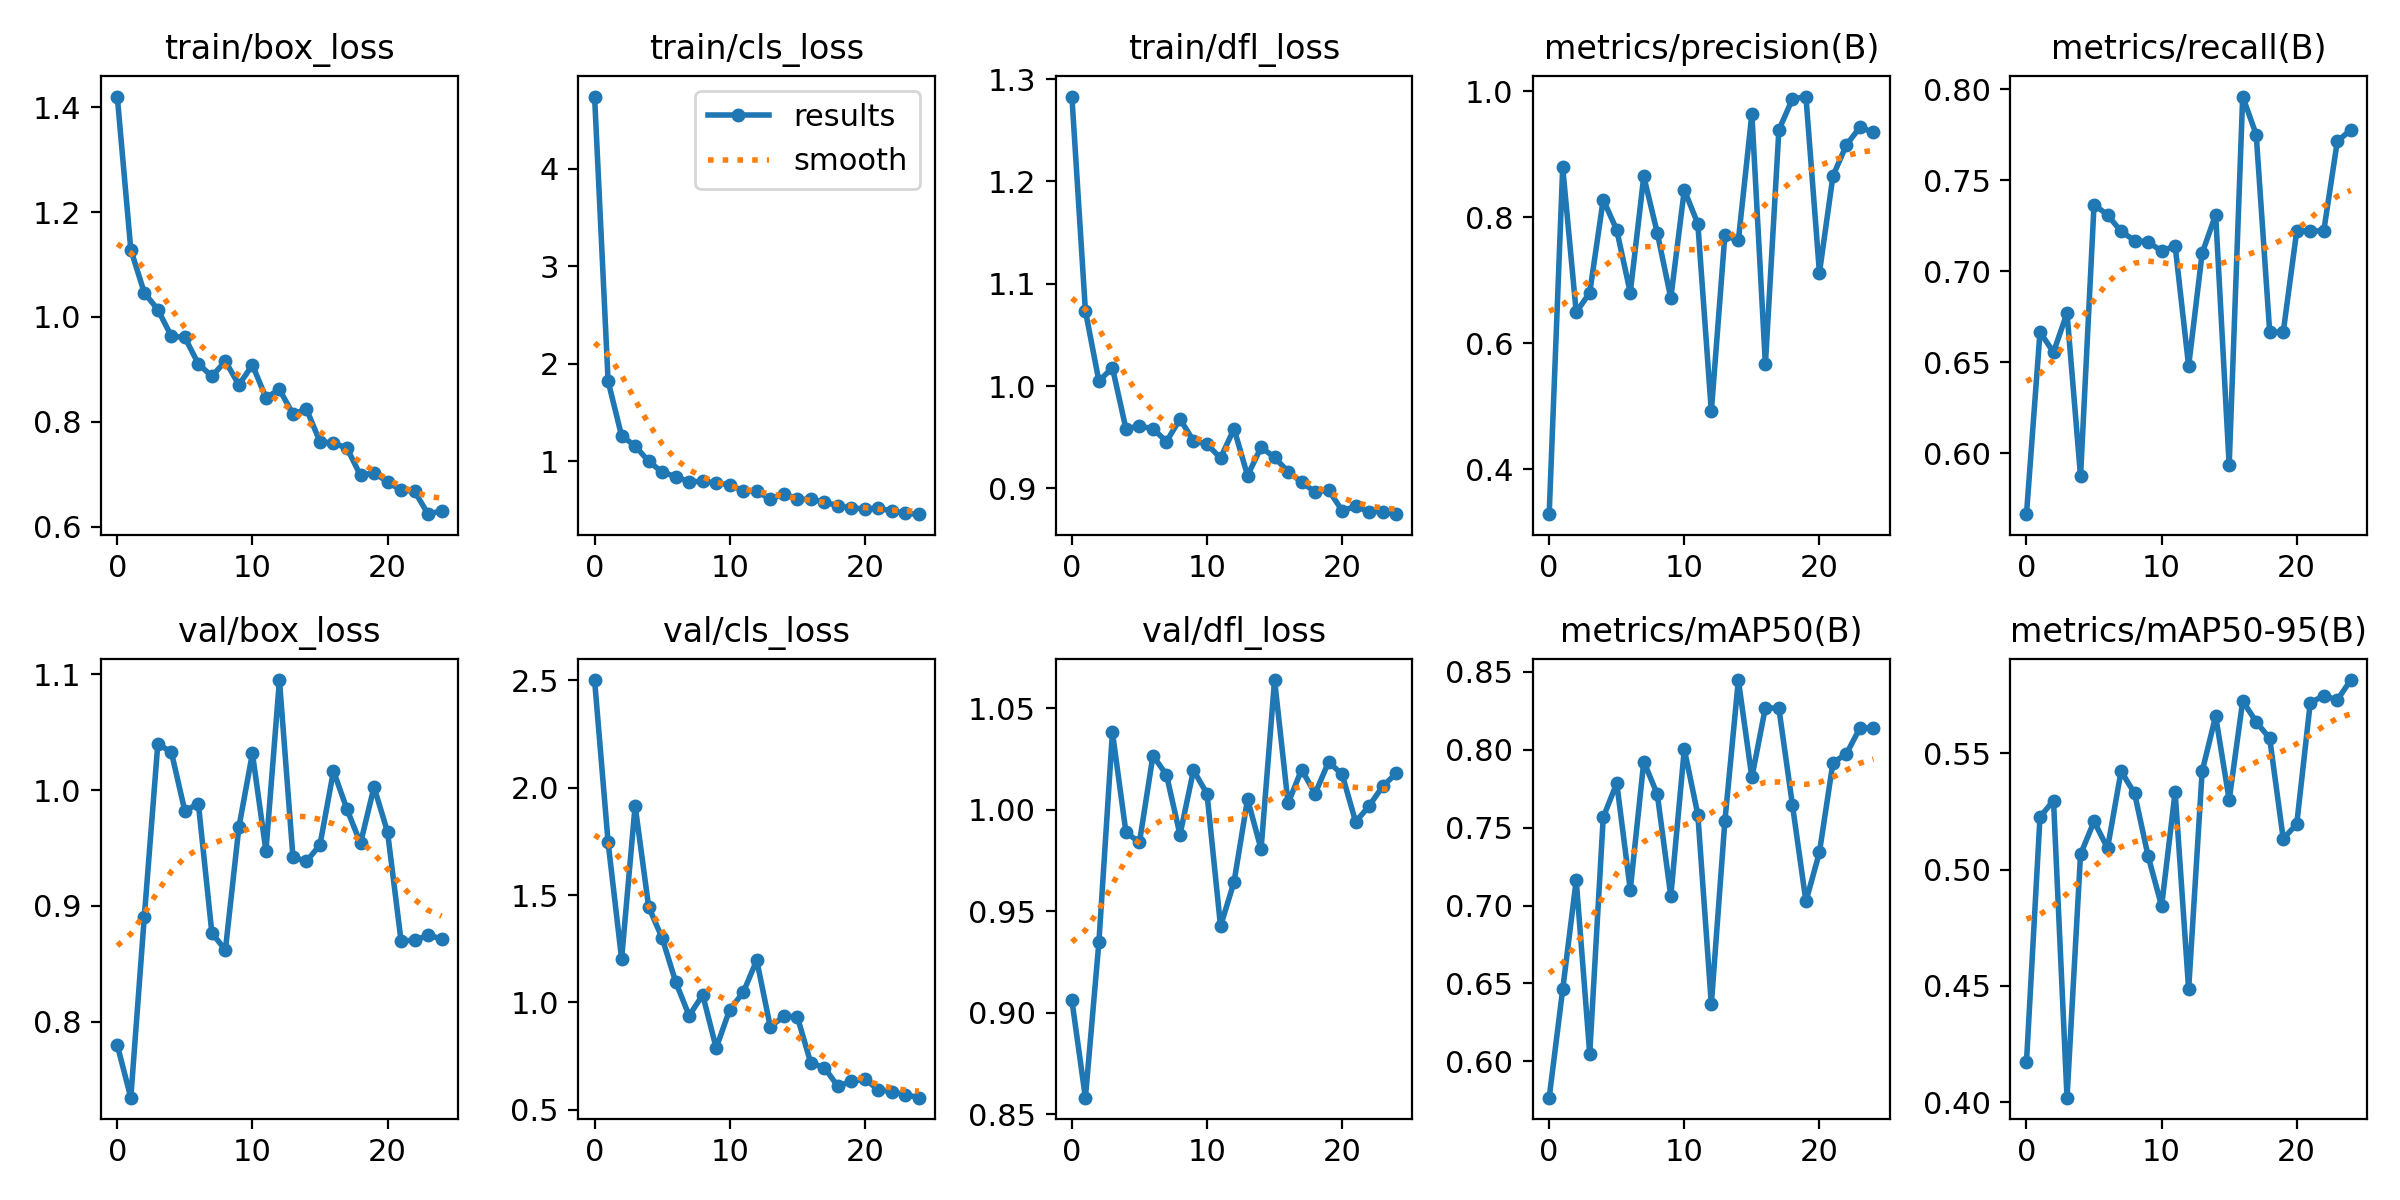

In [59]:
display(Image(filename=f'{HOME}/runs/detect/train/results.png', width=600))
print("\n")
display(Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600))

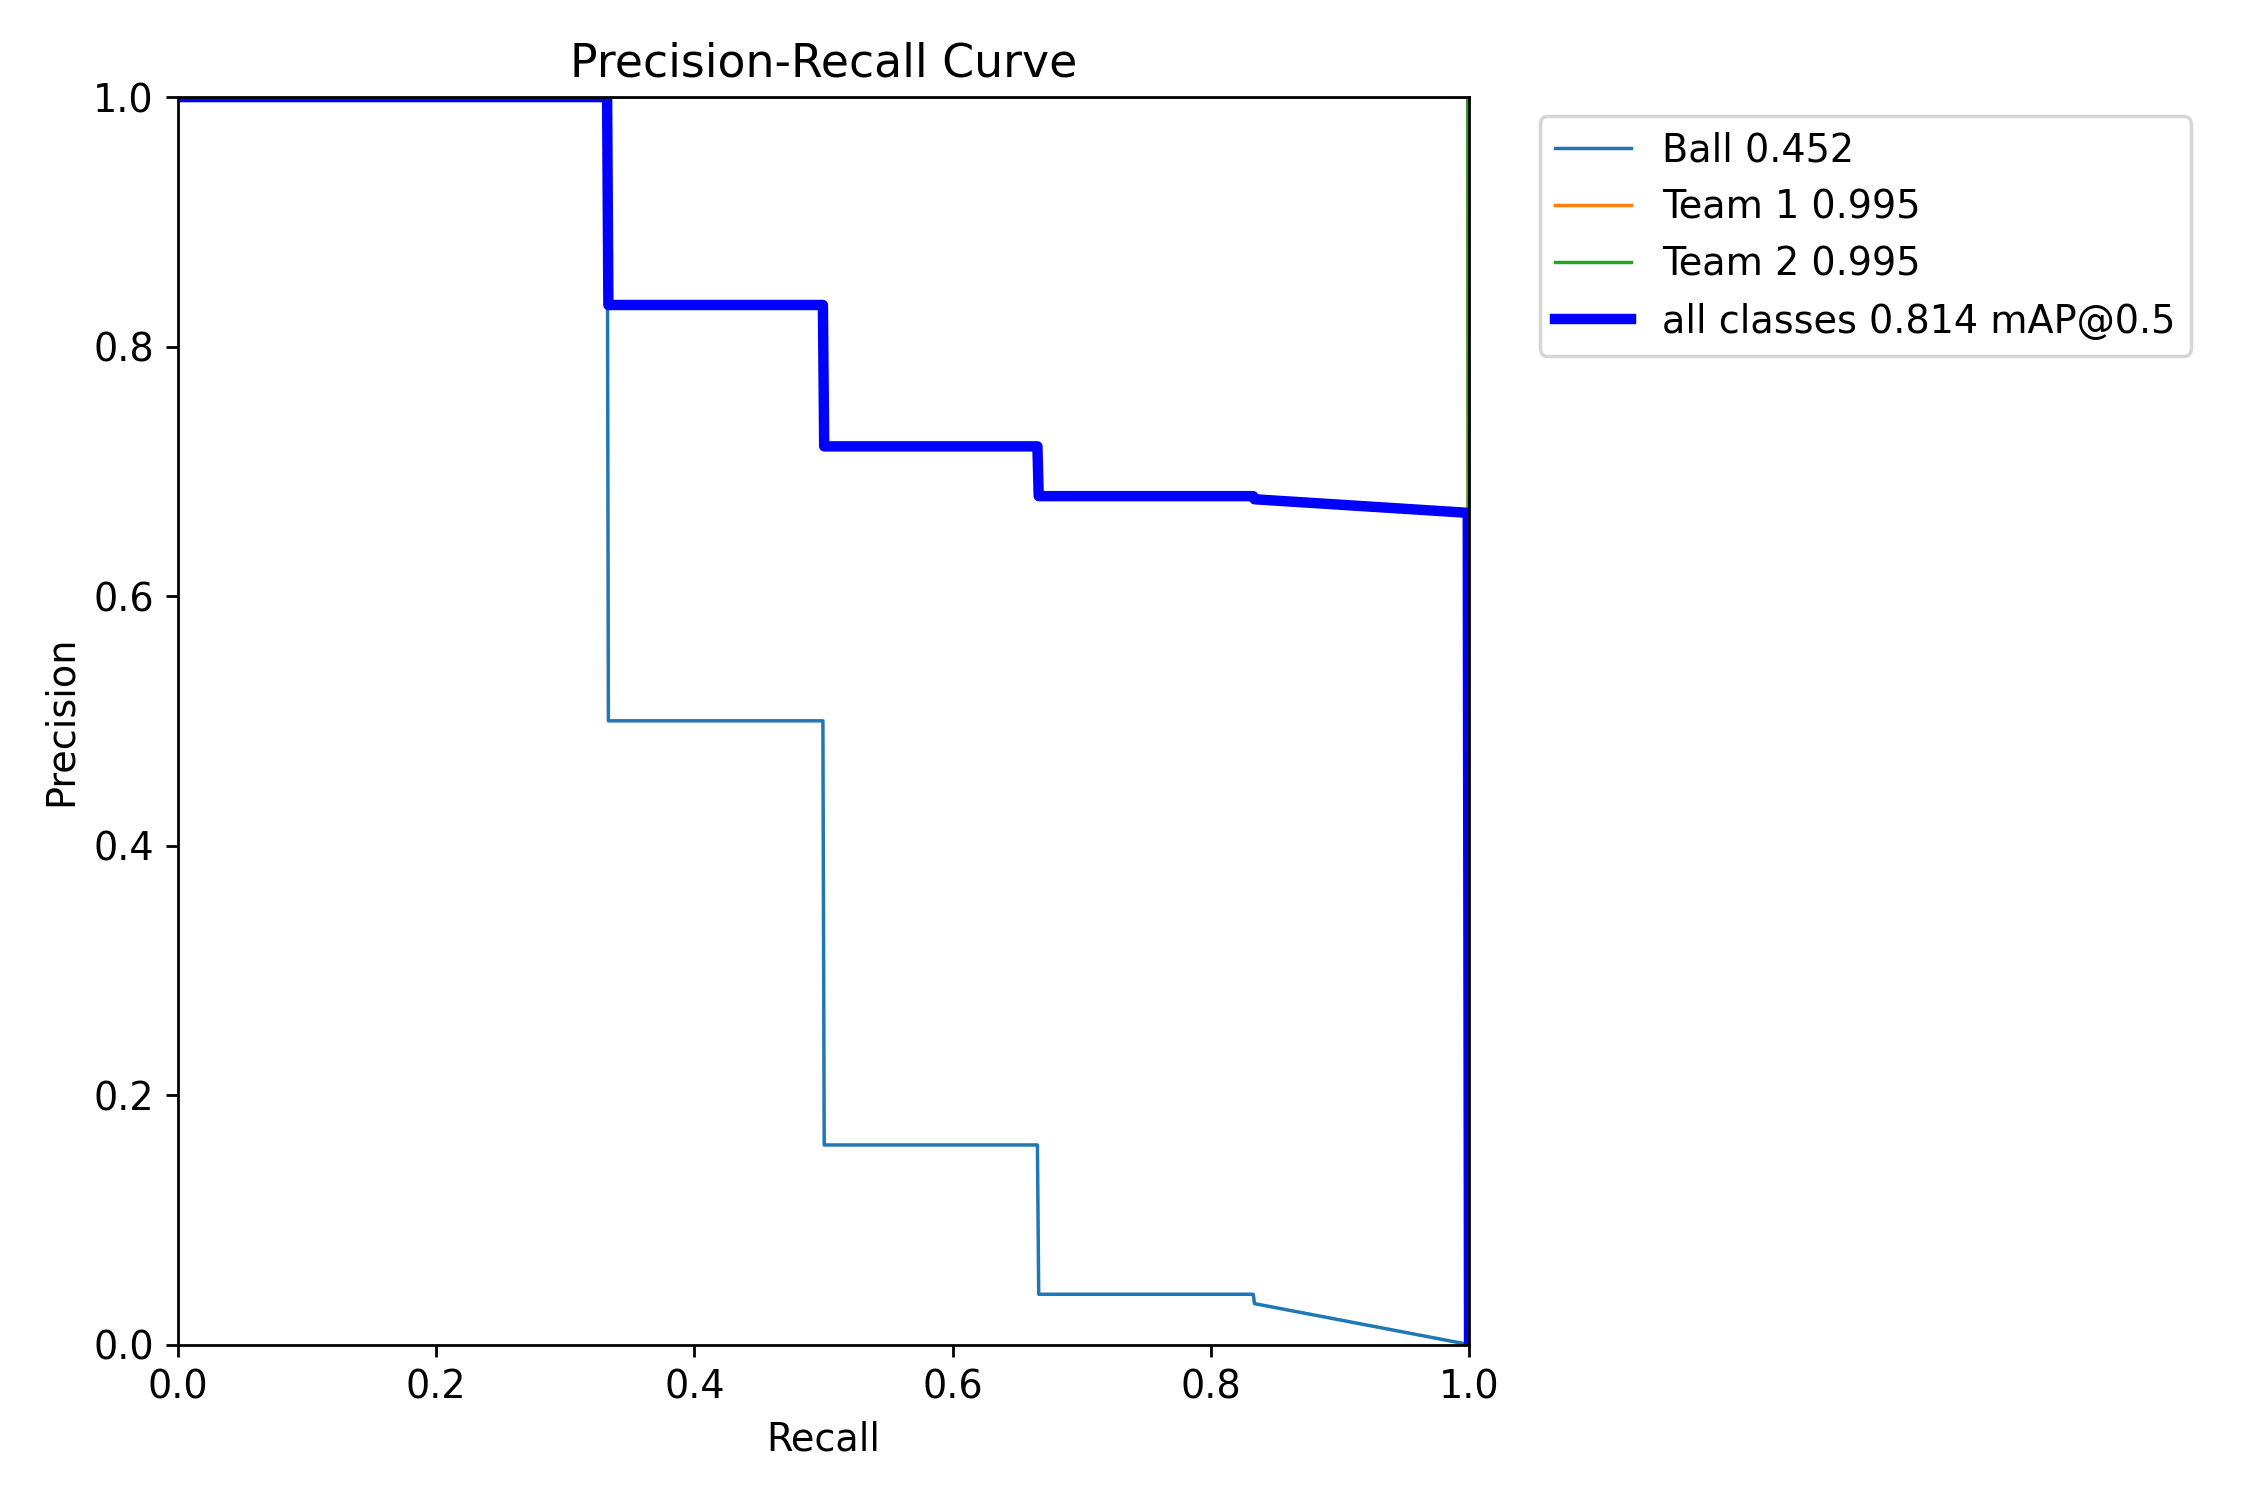

In [60]:
display(Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600))
print("\n")
display(Image(filename=f'{HOME}/runs/detect/train4/PR_curve.png', width=600))

In [61]:
# Validate Model

if not is_trained:
    !yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={YAML_PATH} workers=1 plots=True
else:
    print(f"Model has been validated at {HOME}/runs/detect/val2")

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.0+cu117 CUDA:0 (NVIDIA A100 80GB PCIe MIG 1g.10gb, 9728MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/jovyan/datasets/Pickle-Ball---Tom-Brady-Reach-Out-47/valid/l
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 120, len(boxes) = 134. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         29        134      0.783      0.745      0.703       0.47
                  Ball         29         22      0.817      0.409      0.403      0.165
                Team 1         29         52       0.76      0.942      0.902      0.704
                Team 2         29         60      0.772      0.883      0.804       0.54
Speed: 0.6ms prepr

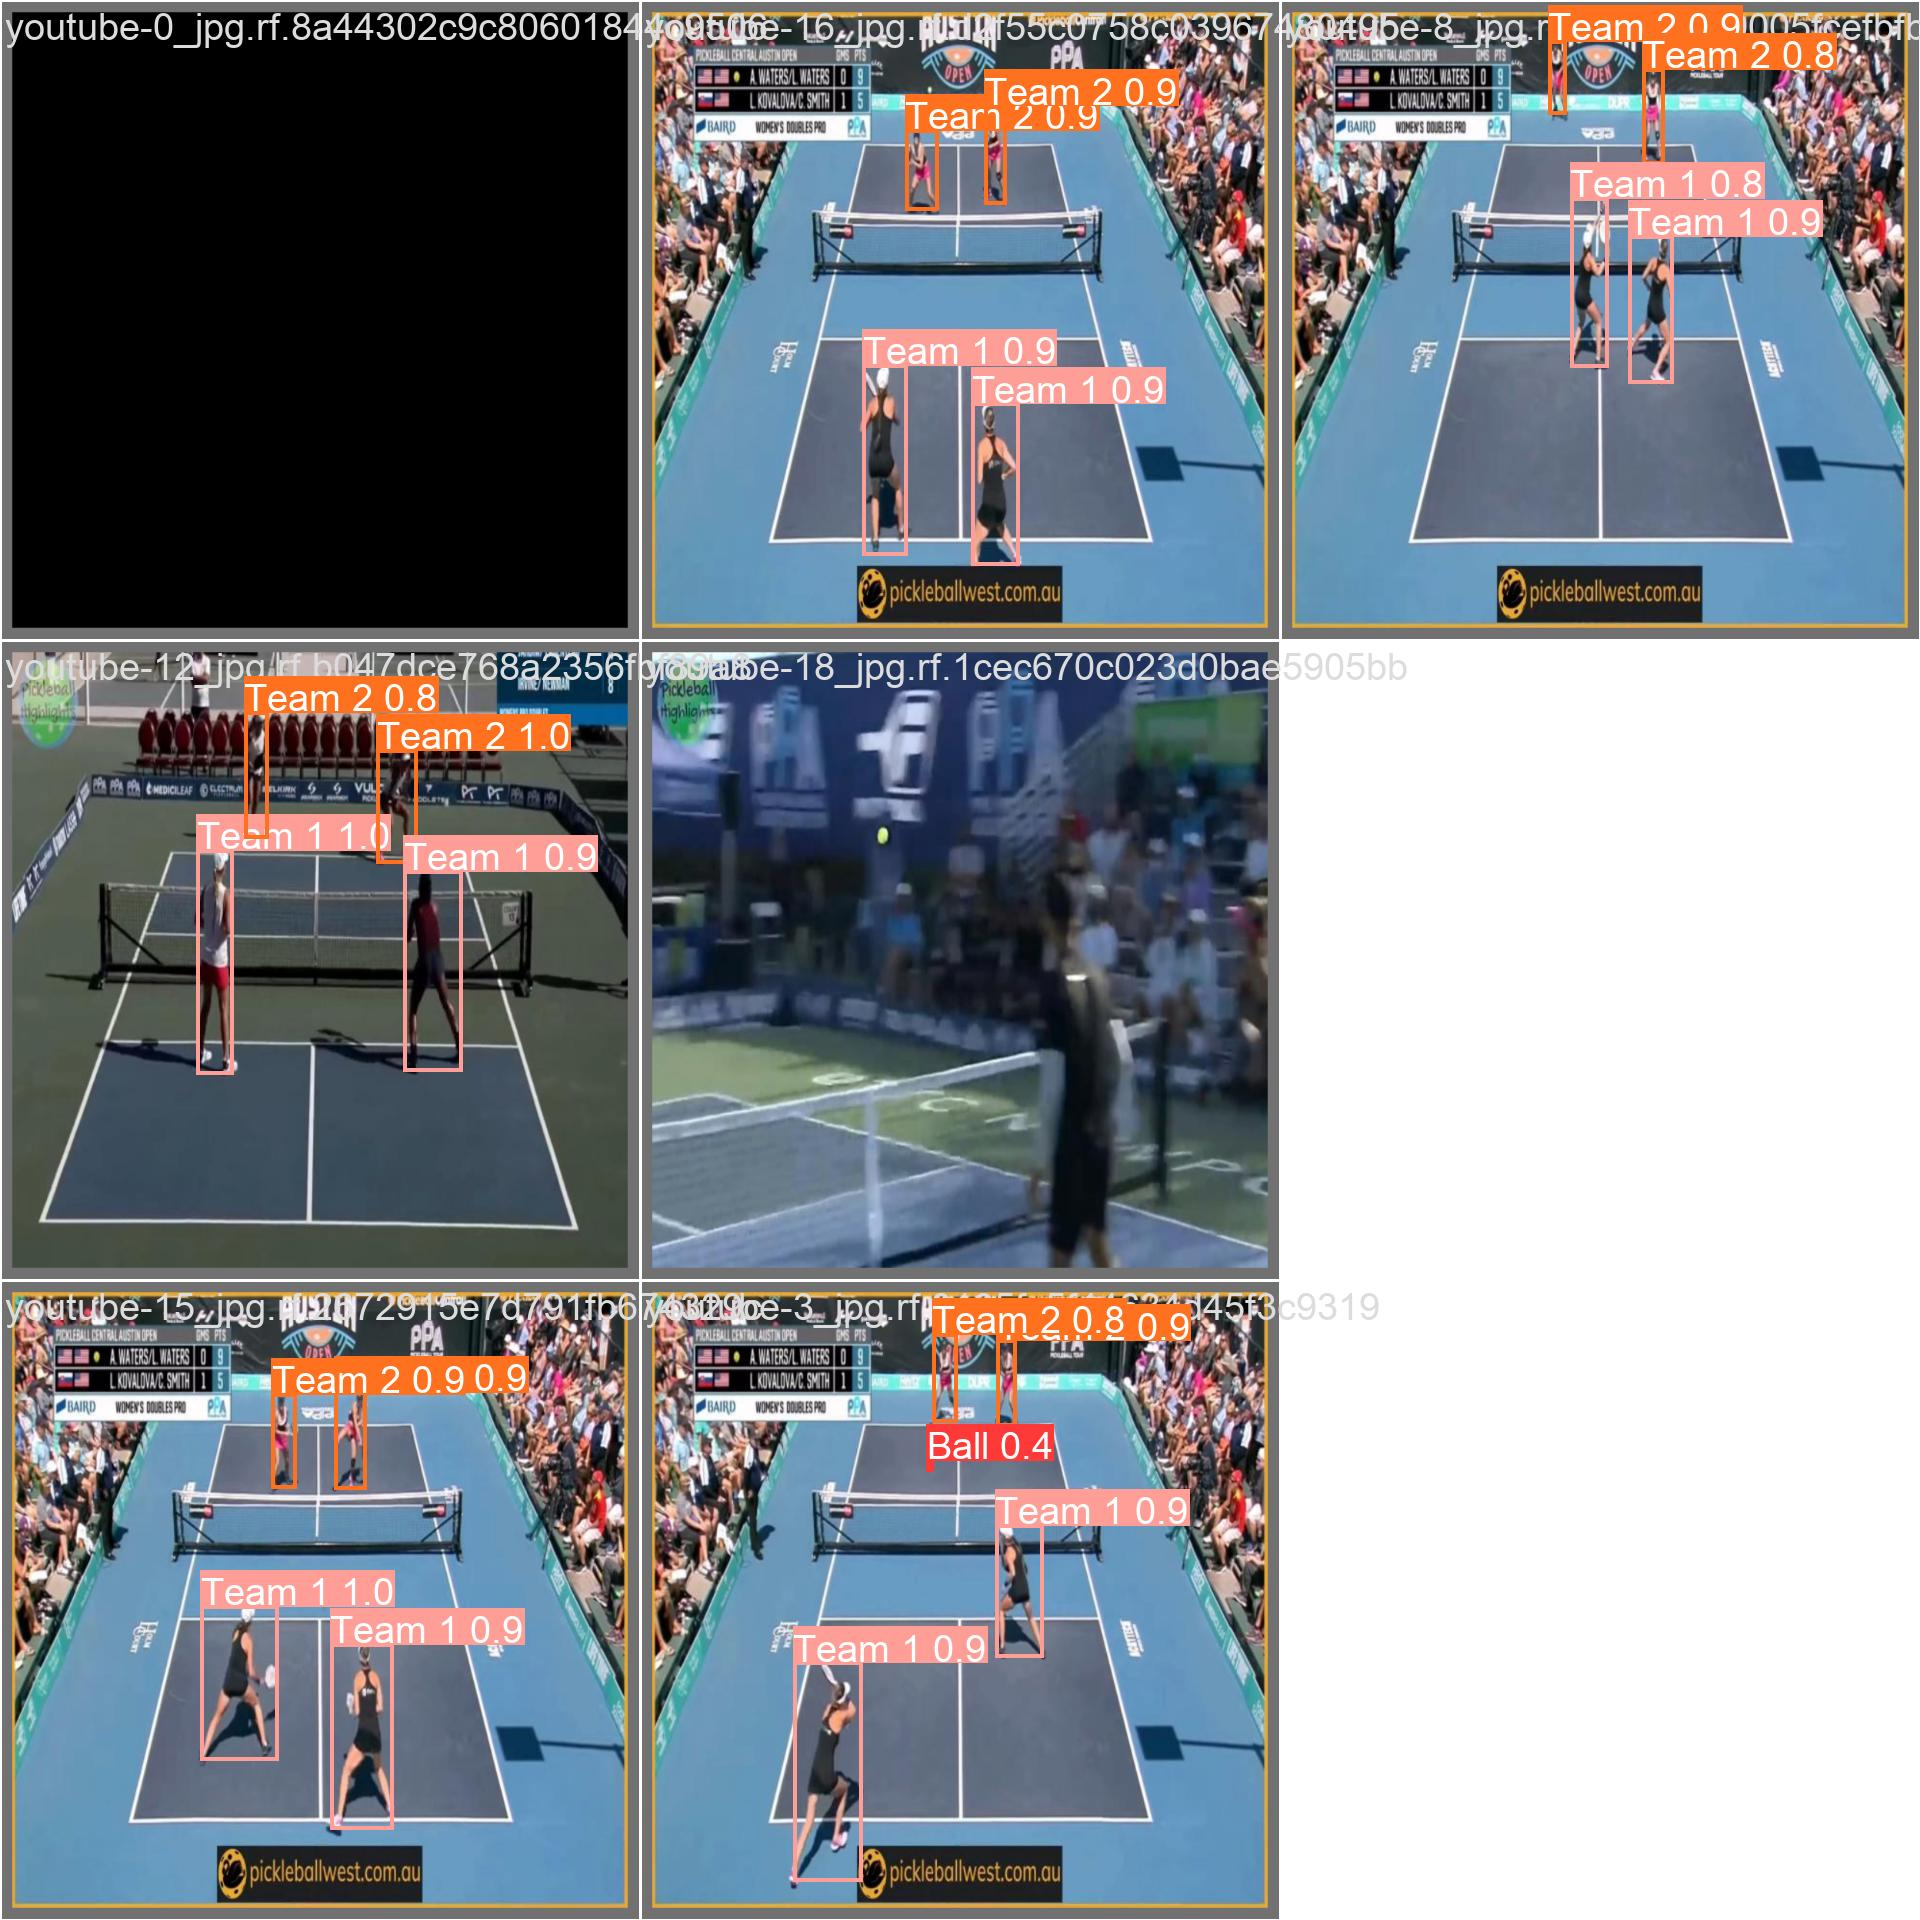

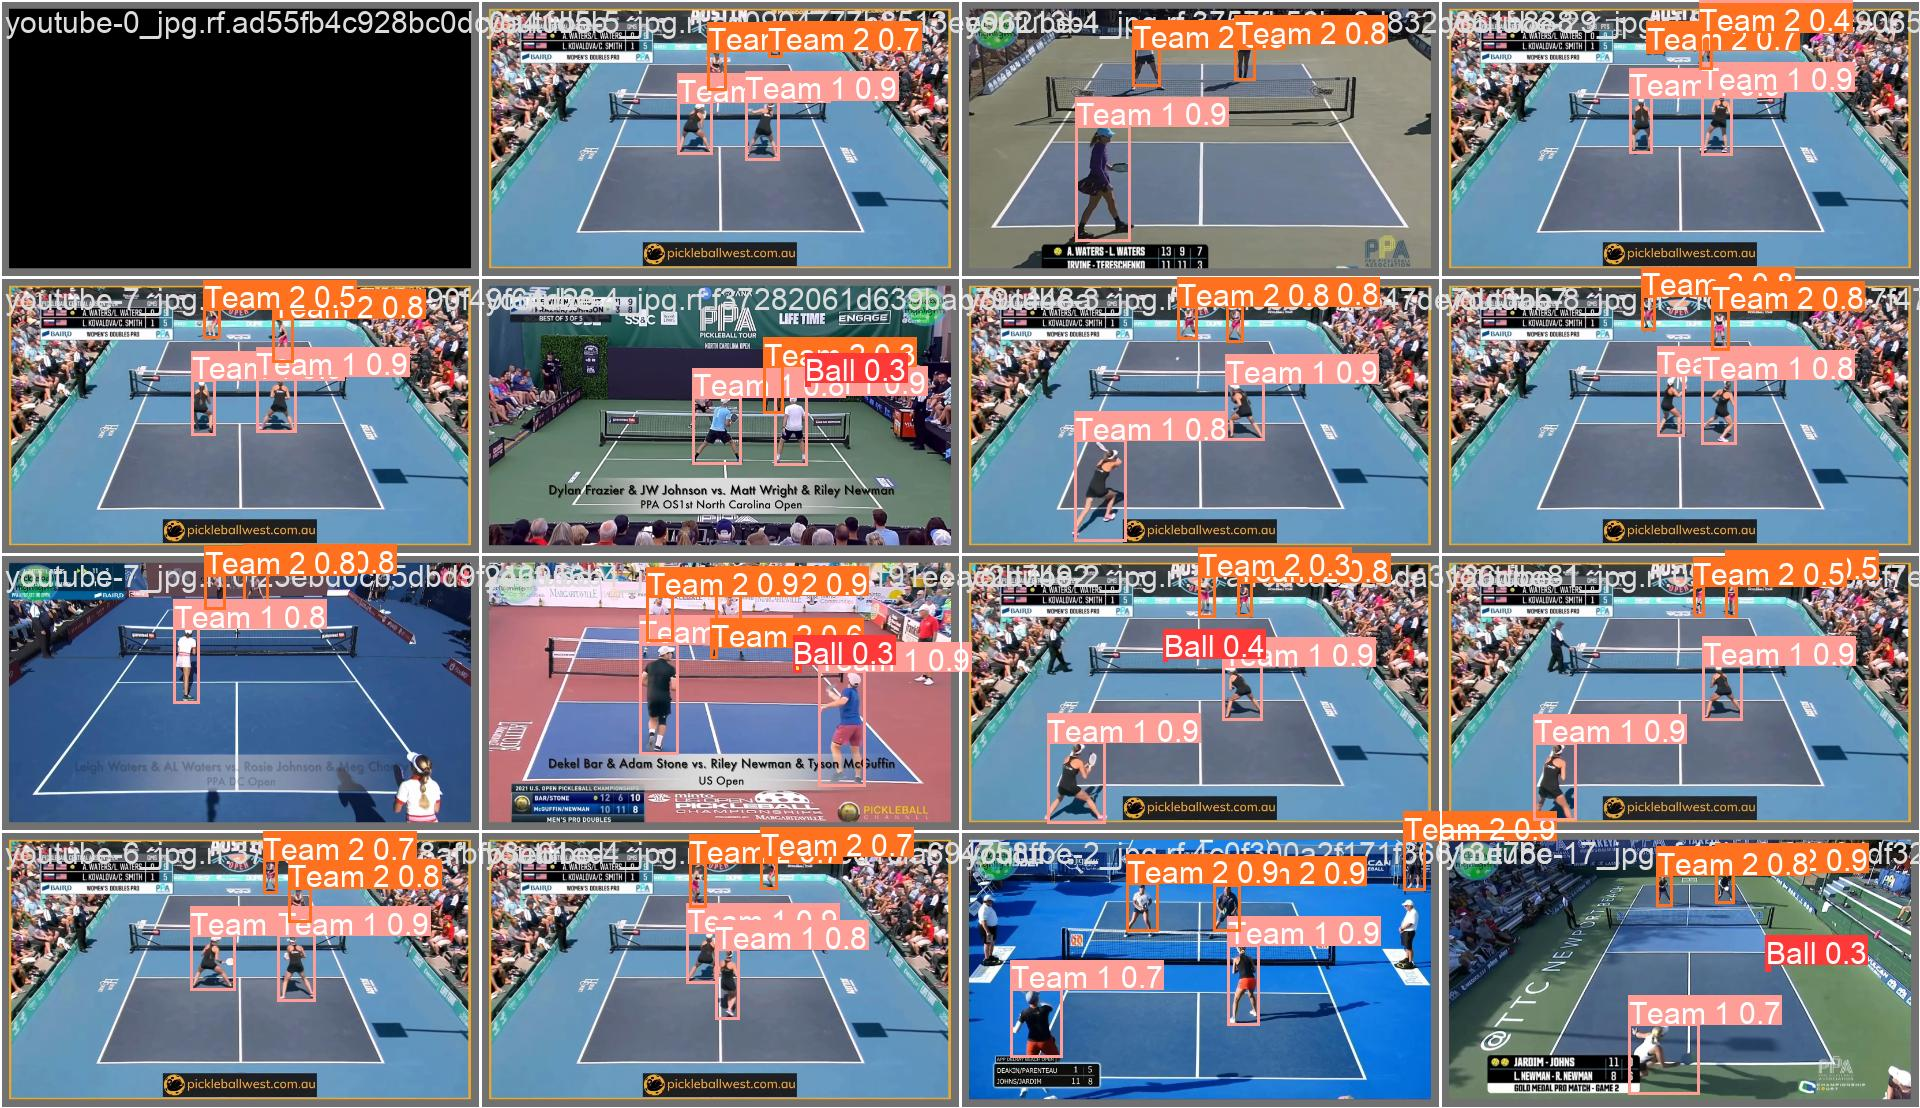

In [63]:
# Examples of detections on the validation batch
display(Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600))
print("\n")
display(Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600))

In [66]:
# Validation plots
# display(Image(filename=f"{HOME}/runs/detect/val/PR_curve.png", width=600))
# print("\n")
# display(Image(filename=f"{HOME}/runs/detect/val2/PR_curve.png", width=600))

In [67]:
# Inference Testing

if not is_trained:
    !yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={HOME}/Pickle-Ball---Tom-Brady-Reach-Out-47/test/images save=True workers=1 plots=True
else:
    print(f"Model has been run on test data. Results at {HOME}/runs/detect/predict2")

Ultralytics YOLOv8.0.196 🚀 Python-3.11.5 torch-2.0.0+cu117 CUDA:0 (NVIDIA A100 80GB PCIe MIG 1g.10gb, 9728MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/22 /home/jovyan/datasets/Pickle-Ball---Tom-Brady-Reach-Out-47/test/images/youtube-12_jpg.rf.8d1a1e59cb6e7181de00557adebf06cb.jpg: 480x800 3 Team 1s, 3 Team 2s, 56.6ms
image 2/22 /home/jovyan/datasets/Pickle-Ball---Tom-Brady-Reach-Out-47/test/images/youtube-14_jpg.rf.9612ded17f6d002bd1ac3240f84efa69.jpg: 480x800 3 Team 1s, 2 Team 2s, 8.3ms
image 3/22 /home/jovyan/datasets/Pickle-Ball---Tom-Brady-Reach-Out-47/test/images/youtube-16_jpg.rf.d4146665bc4ea79ce8020b526df25ad8.jpg: 480x800 1 Team 1, 2 Team 2s, 8.3ms
image 4/22 /home/jovyan/datasets/Pickle-Ball---Tom-Brady-Reach-Out-47/test/images/youtube-16_jpg.rf.e16c3b4dc18ba7fbc03fb46f795dc2e9.jpg: 480x800 2 Team 1s, 2 Team 2s, 8.3ms
image 5/22 /home/jovyan/datasets/Pickle-Ball---Tom-Brady-Reach-Out-47/test/images/youtube-18_jpg.rf.7061477d8a9

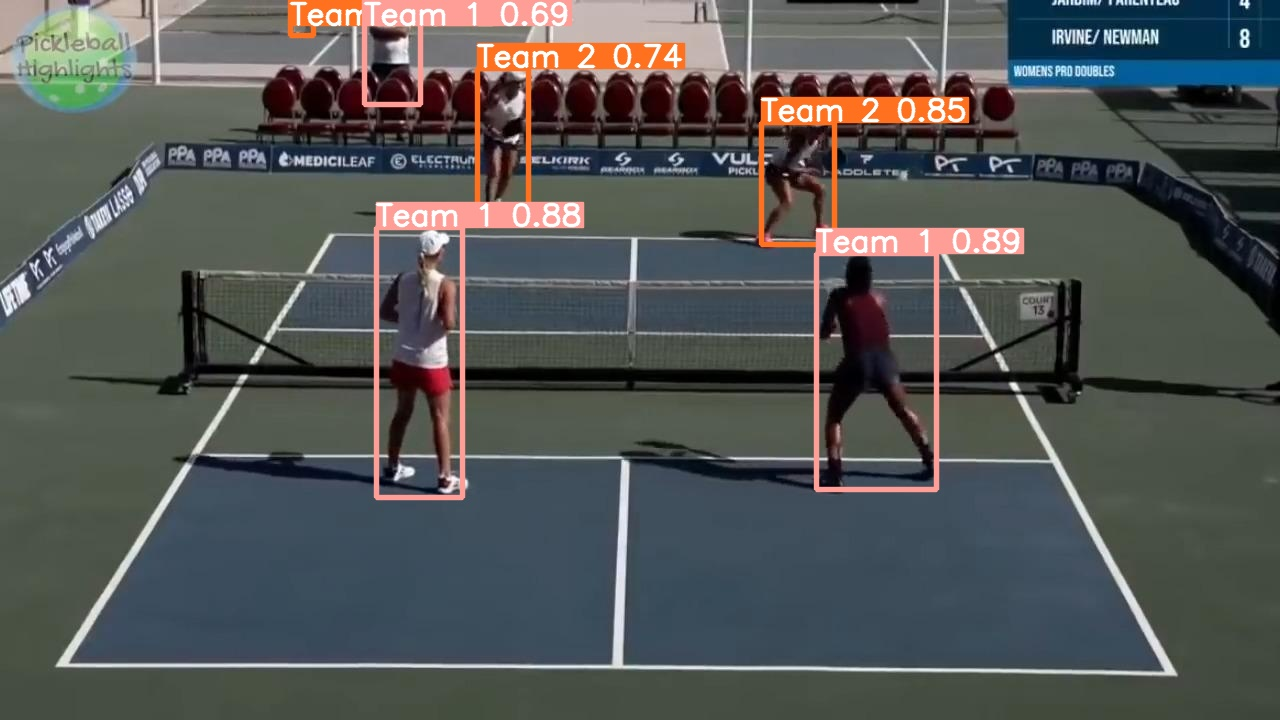

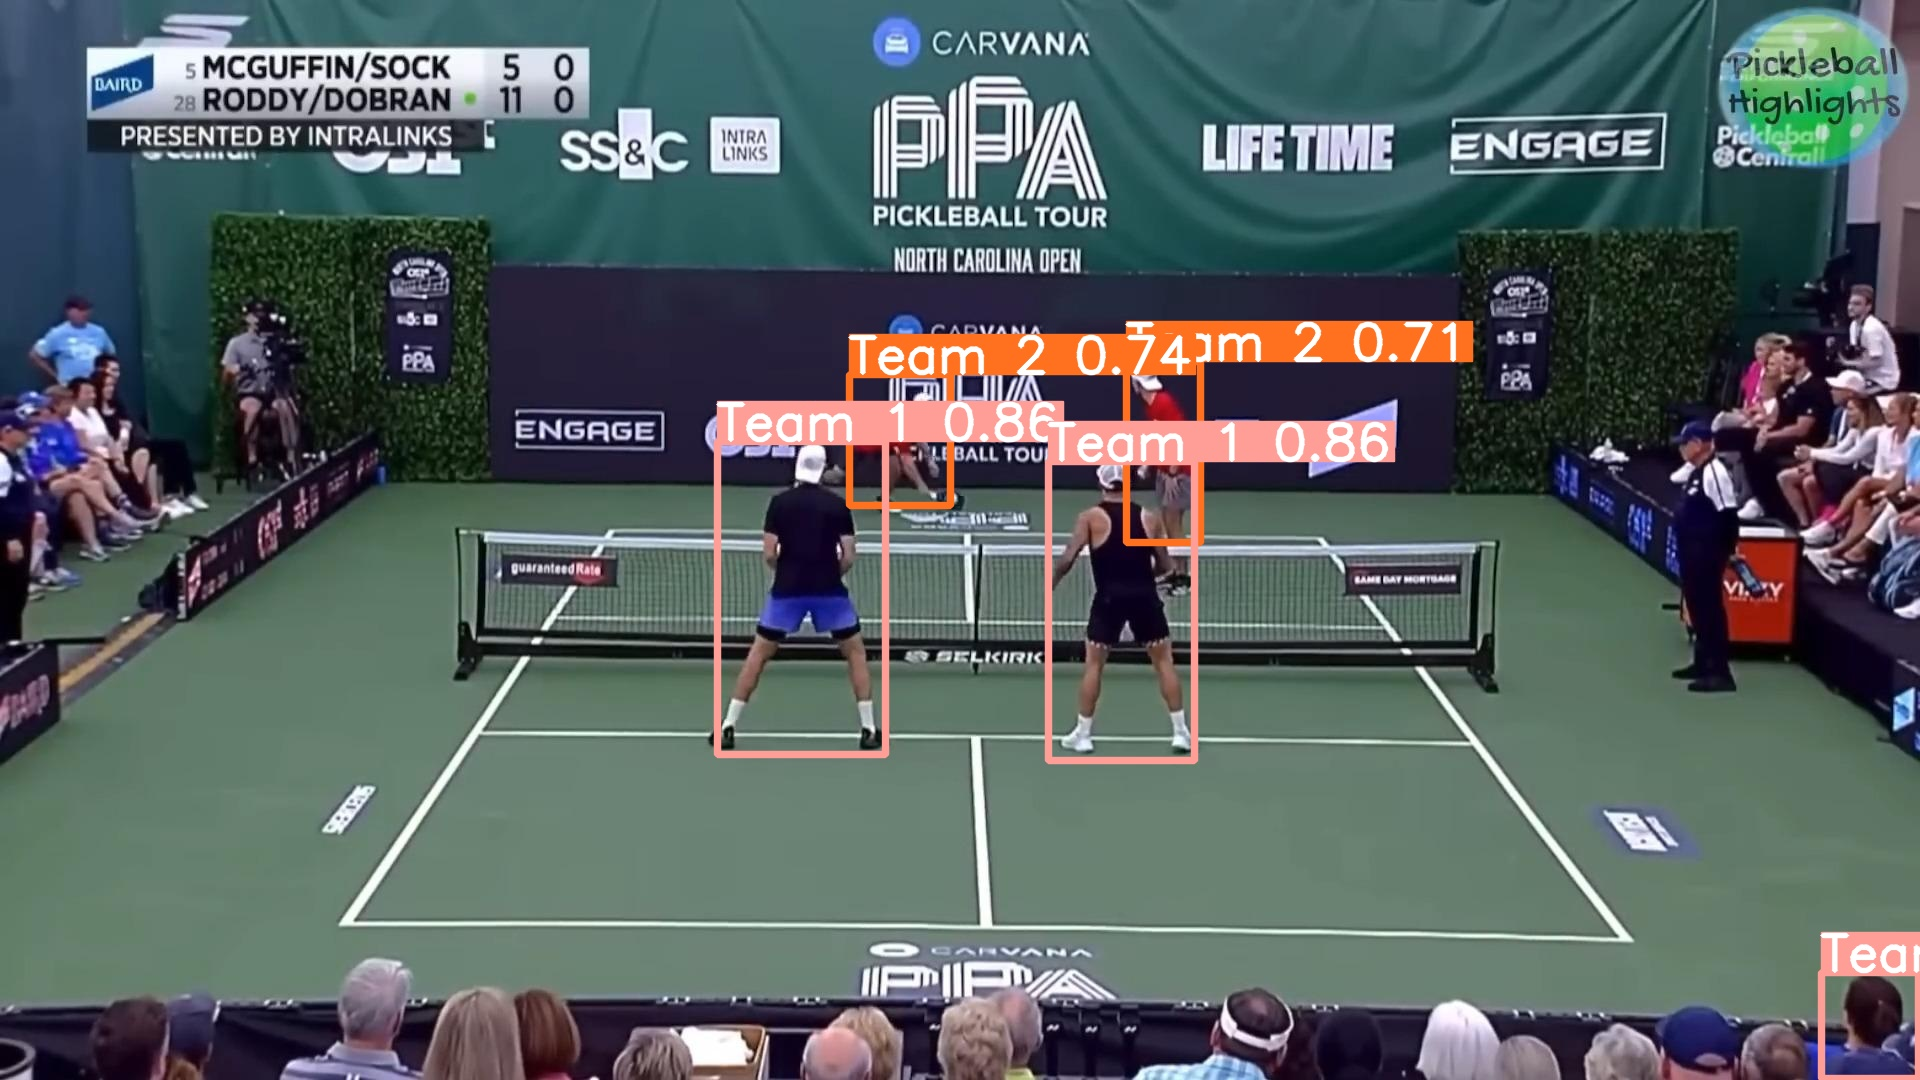

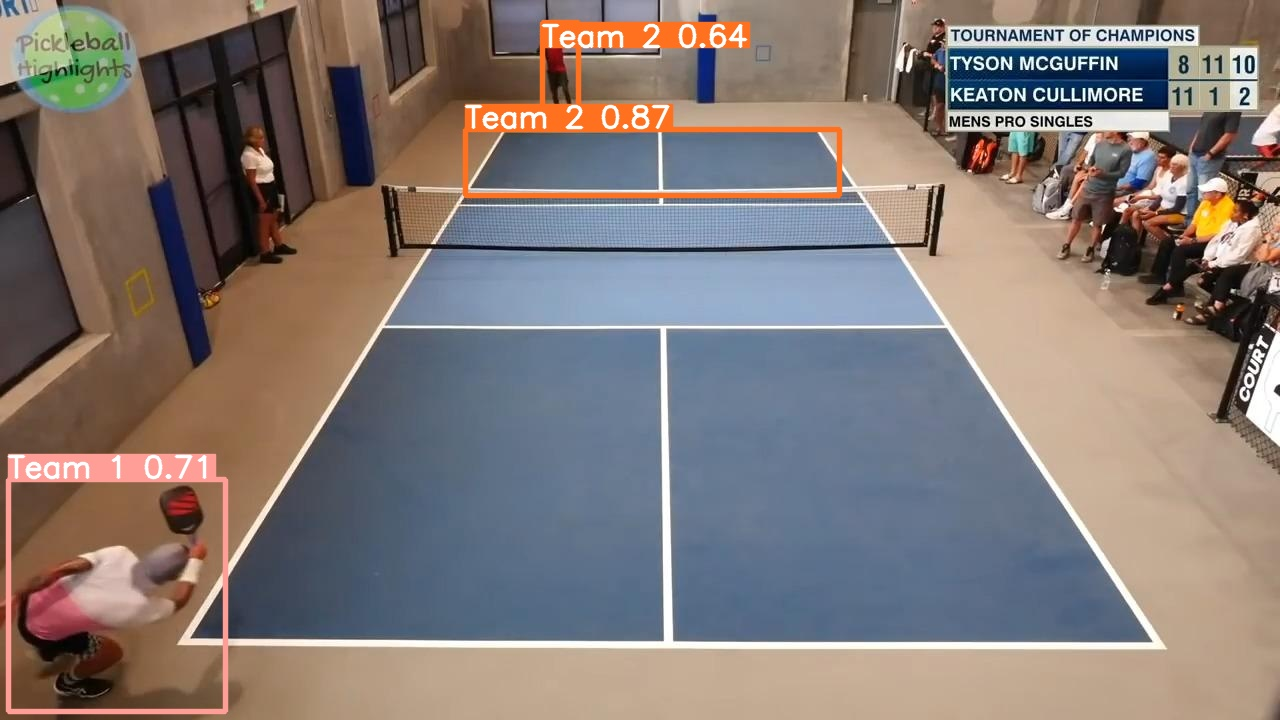

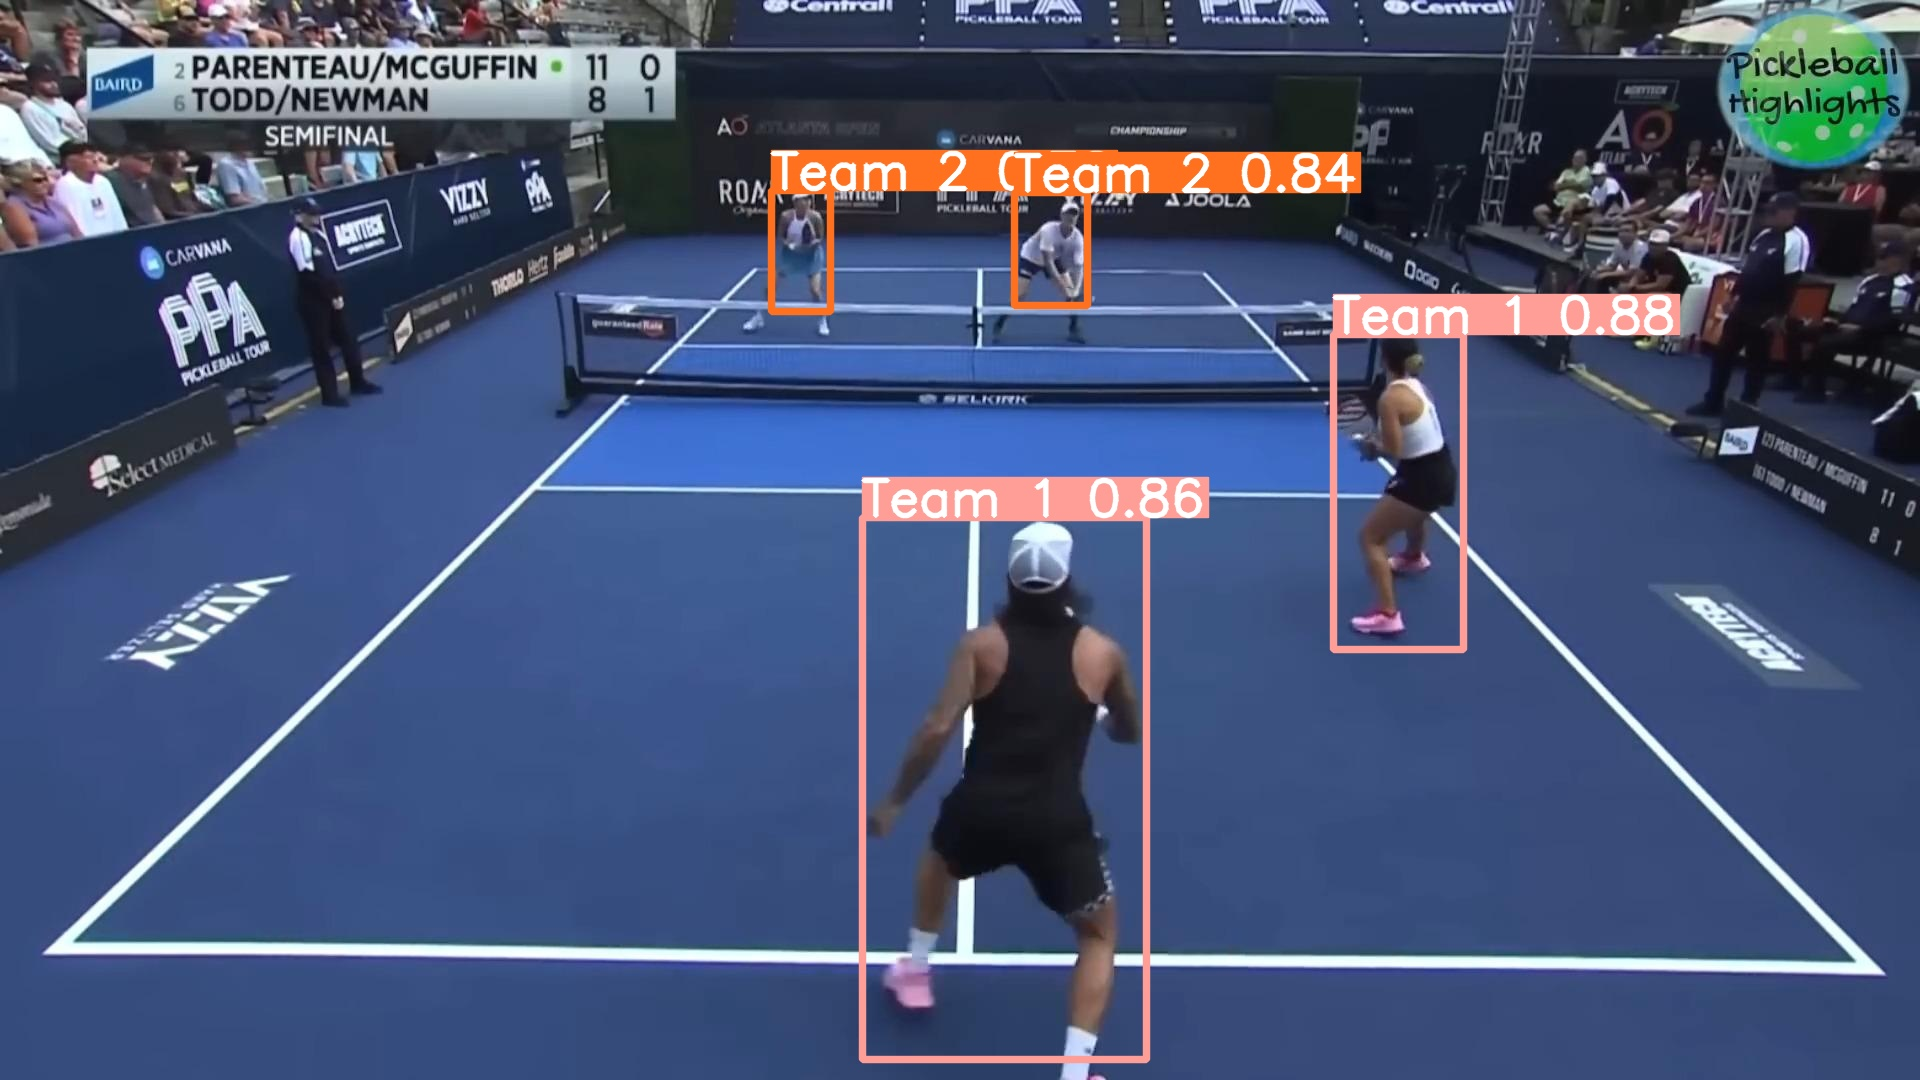

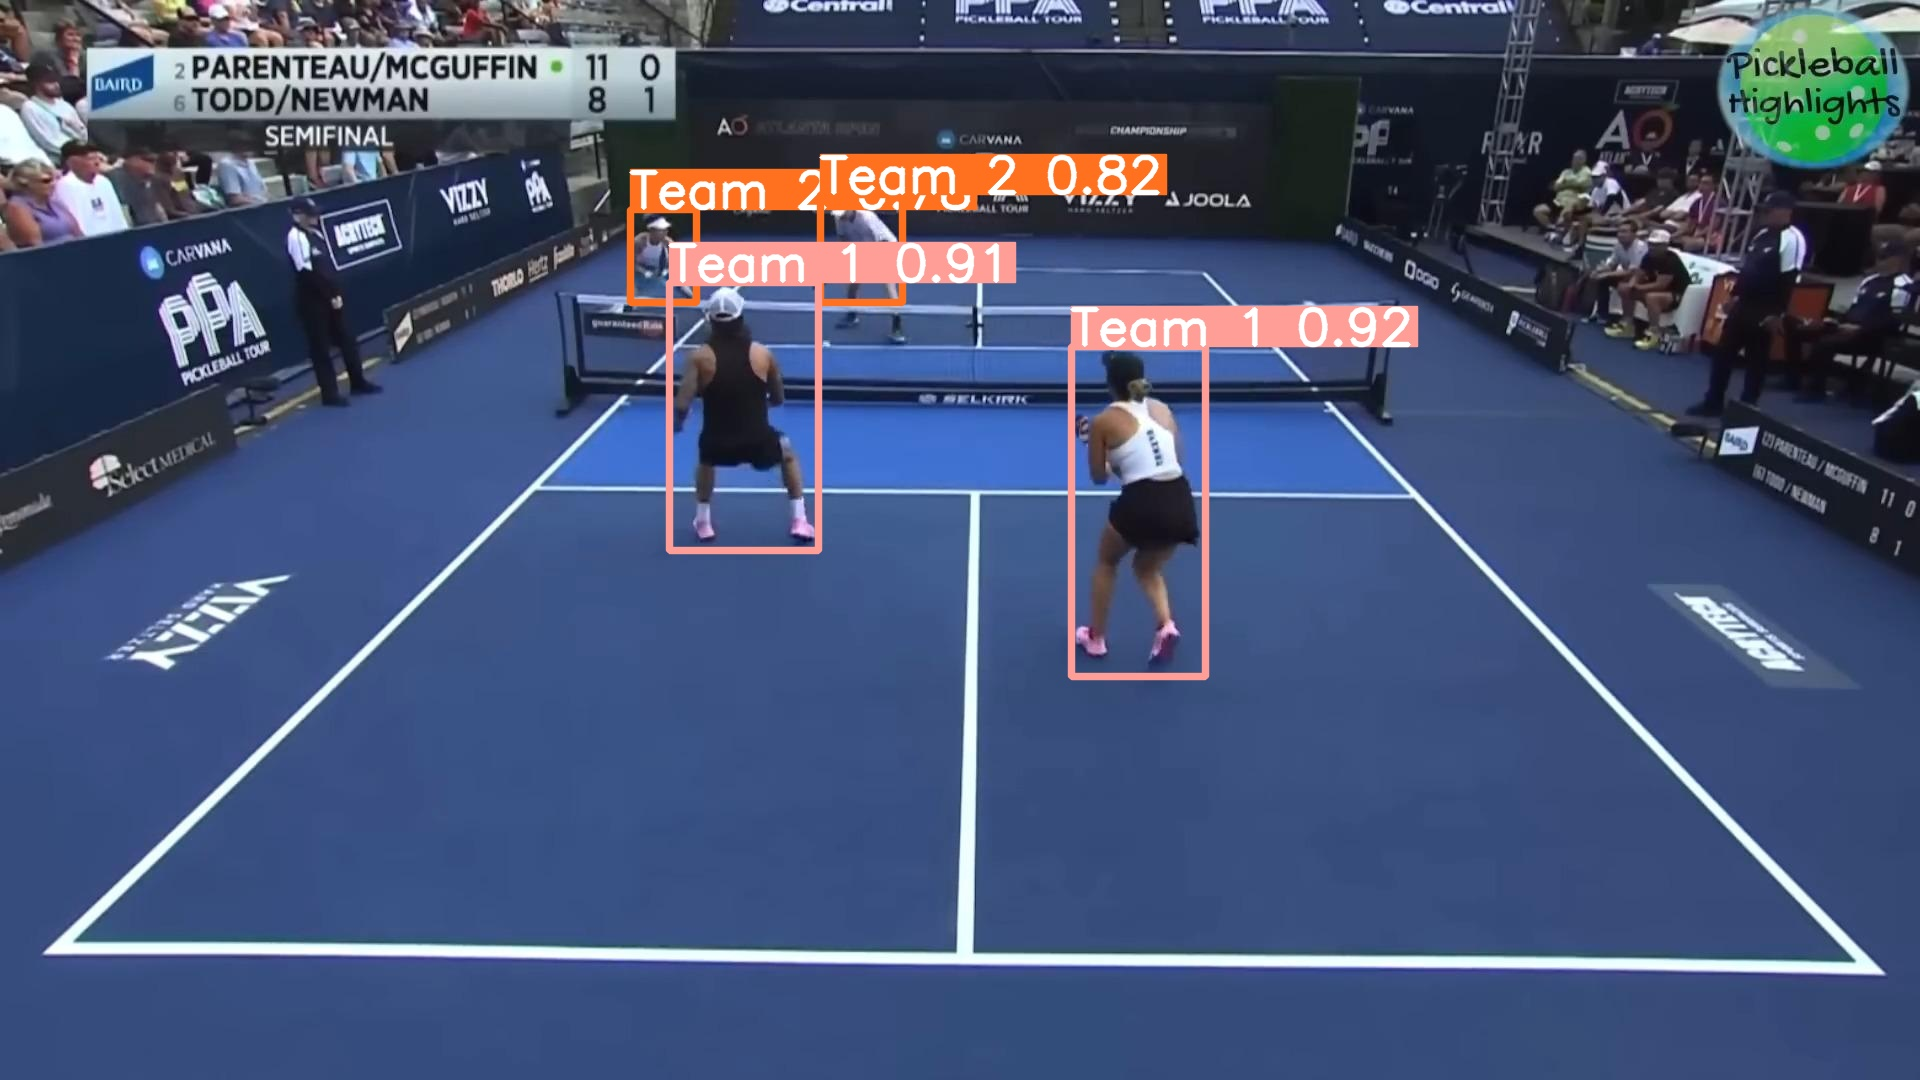

In [68]:
# visualize predictions on five instances of the test set
import glob

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [69]:
from PIL import Image
from ultralytics import YOLO
import cv2

if not is_trained:
    # Load a pretrained YOLOv8n model
    model = YOLO(f'{HOME}/runs/detect/train4/weights/best.pt')
    
    # Open the video file
    input_video = "/home/jovyan/test-input.mp4"
    cap = cv2.VideoCapture(input_video)
    
    # Get the frame rate and size
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Create a video writer
    out = cv2.VideoWriter('/home/jovyan/output-video2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    
    # Loop over the frames
    while cap.isOpened():
        # Read a frame
        ret, frame = cap.read()
        if not ret:
            break
    
        # Run inference on the frame
        results = model(frame)
    
        # Plot the results on the frame
        im_array = results[0].plot()
    
        # Write the frame to the output file
        out.write(im_array)
        # Wait for a key press or end of video
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release the video capture, writer and destroy the window
    cap.release()
    out.release()
else:
    print("Model has produced output video. Results at /home/jovyan/output-video2.mp4")


0: 480x800 (no detections), 8.8ms
Speed: 3.7ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 0.5ms 